## Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.
Now, they want to __build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products__.

## Importing Libarries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso,LassoCV
from sklearn.linear_model import Ridge,RidgeCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import  RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

import warnings
warnings.filterwarnings('ignore')

## Loading the Data

In [2]:
bf_purchase_df = pd.read_csv("train.csv",sep=",",header="infer")
bf_purchase_df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


## Exploratory Data Analysis

#### Step 1 : Data check

Checking the shape,head and tail of data

In [3]:
len(bf_purchase_df)

550068

In [4]:
bf_purchase_df.shape #the .shape attribute of the DataFrame shows its dimensionality. The result is a tuple containing the number of rows and columns.

(550068, 12)

In [5]:
bf_purchase_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
bf_purchase_df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


The shape shows it has 550068 records and 12 columns. The head and tail shows 5 rows each by default and also shows the records are showing some NaN values. So we can say we have missing data.

#### Step 2: Datatype Check

In [7]:
bf_purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


The columns have some missing values like in Product_Category_2,Product_Category_3 the row counts < len(bf_purchase_df).All the features are expected to be Non-Null but they surely have missing values. The data types in this case are : 5 int64,5 object & 2 float64 types. We will get more details when we explore more.

#### Step 3: Descriptive Statistics

In [8]:
pd.set_option('precision',3) # Precision set to show the values only upto 3 places for better visibility
bf_purchase_df.describe()


,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.501e+05,550068.000,550068.000,550068.000,376430.000,166821.000,550068.000
mean,1.003e+06,8.077,0.410,5.404,9.842,12.668,9263.969
std,1.728e+03,6.523,0.492,3.936,5.087,4.125,5023.065
min,1.000e+06,0.000,0.000,1.000,2.000,3.000,12.000
25%,1.002e+06,2.000,0.000,1.000,5.000,9.000,5823.000
50%,1.003e+06,7.000,0.000,5.000,9.000,14.000,8047.000
75%,1.004e+06,14.000,1.000,8.000,15.000,16.000,12054.000
max,1.006e+06,20.000,1.000,20.000,18.000,18.000,23961.000


This describe shows all the numerical features only. We can say there are 7 numerical features here.(5 int64 & 2 float64)
We can view the dresciptive statistics on those data :
1. Count seems lower in case of Product_Category_2,Product_Category_3 => must have missing values
2. All the means > 50%(median) for all features except for Product_Category_3.If the mean is greater than the median, the distribution is positively skewed. If the mean is less than the median, the distribution is negatively skewed.
3. The min values are nearer to 50% and max - 50% is more implies the data is skewed in right and more data is present towards the right so the mean > median.
4. The variation in range of data shows we need scaling in data as well.
5. The mean > median, but not too high and also the 75% and max have less diff, so we can say it might not have too much outliers.

We can use describe for object dtypes using the setting as follows:

In [9]:
bf_purchase_df.describe(include=np.object)

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


We are now able to see the 5 object datatypes available. Here we will not be able to see mean,median as they are not applicable to object dtype, rather mode is found as "Top" for each feature.All counts and unique counts are avialble to us.Frequency is the rate at which the Top occurs over a period of time within the dataset. 
1. Out of all object dtypes and Gender is Binomial and rest are multinomial.
2. The Age column is in bins format.

In [10]:
bf_purchase_df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

Here we find:
1. User_Ids must be repeated as we find 5891 out of 550068 as unique. Similarly all values here are repeated too.
2. Gender and Marital_Status are Binomial features.Other categorical features have multinominal features.
3. Even though Occupation column is int64 but it looks like having some 21 numbers and is Masked.Same with other columns like Product_Category_X

#### Step 4: Duplicate check

In [11]:
bf_purchase_df.duplicated().any() # It returns False here implies none of the records are duplicated.If there were duplicates we could have used drop_duplicates() to drop only those records.

False

#### Step 5: Missing value checks

In [12]:
bf_purchase_df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [13]:
(bf_purchase_df.isna().sum()/len(bf_purchase_df))*100

User_ID                        0.000
Product_ID                     0.000
Gender                         0.000
Age                            0.000
Occupation                     0.000
City_Category                  0.000
Stay_In_Current_City_Years     0.000
Marital_Status                 0.000
Product_Category_1             0.000
Product_Category_2            31.567
Product_Category_3            69.673
Purchase                       0.000
dtype: float64

As shown above Product_Category_2,Product_Category_3 has missing values which is around 31% and 70% of total.
There are multiple options available as the Product_Category_3 has > 60% missing we can just drop the columns but here we see that the product_categories may also be really important factor. so lets replace Na with values not present earlier.

In [14]:
bf_purchase_df.Product_Category_2.value_counts() # So we can replace missing value with 0 assuming no purchase was done in this category

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [15]:
bf_purchase_df.fillna(value=0,inplace=True,axis=1)
convert_dict = {'Product_Category_2':int,'Product_Category_3':int}
bf_purchase_df = bf_purchase_df.astype(convert_dict)

In [16]:
bf_purchase_df.isna().sum() #No  more missing values present

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [17]:
bf_purchase_df.head() # Now the product_category columns have int dtypes.

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969


In [18]:
bf_purchase_df.describe() 
#We find that the mean and std have changed for these data now.For Product_Category_3 we know that as 70% was NaN thus it shows 50% is 0 which is obvious.

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.501e+05,550068.000,550068.000,550068.000,550068.000,550068.000,550068.000
mean,1.003e+06,8.077,0.410,5.404,6.735,3.842,9263.969
std,1.728e+03,6.523,0.492,3.936,6.215,6.251,5023.065
min,1.000e+06,0.000,0.000,1.000,0.000,0.000,12.000
25%,1.002e+06,2.000,0.000,1.000,0.000,0.000,5823.000
50%,1.003e+06,7.000,0.000,5.000,5.000,0.000,8047.000
75%,1.004e+06,14.000,1.000,8.000,14.000,8.000,12054.000
max,1.006e+06,20.000,1.000,20.000,18.000,18.000,23961.000


In [19]:
bf_purchase_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969


#### Outliers check

In [20]:
bf_purchase_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,0,0,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,0,0,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,0,0,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,0,0,365


#### Step 6: Univariate Analysis

User_ID,Product_ID are id columns that has no relation with the purchase amount. Any one is equally excited to purchase on Black Friday and at instant of buying Product_ID is picked so we can drop both these columns

In [21]:
bf_purchase_df.drop(columns=['User_ID','Product_ID'],axis=1,inplace=True)

In [22]:
encode_list = []

Lets check the Gender column

In [23]:
bf_purchase_df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

As we know gender is binomial and has given counts that shows M > F counts. We will be doing __Encoding__ on this column. Hence added to  my encode_list.

In [24]:
encode_list.append('Gender')

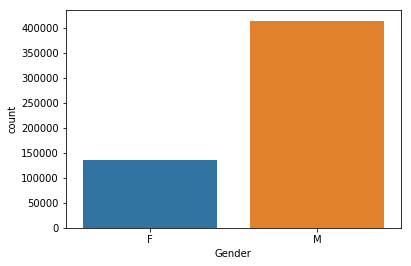

In [25]:
sns.countplot(bf_purchase_df['Gender'])

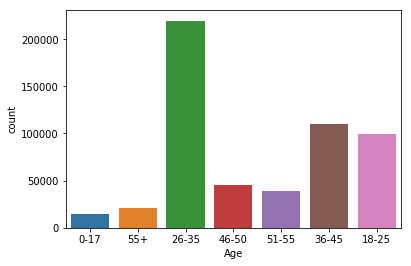

In [26]:
sns.countplot(bf_purchase_df['Age'])

In Age feature, we find the more counts for 26-35 age. Obviously adults show more excitement for black friday sale and we will see if they really do more value of purchase.This is als to be __Encoded__.Hence added to  my encode_list.

In [27]:
encode_list.append('Age')

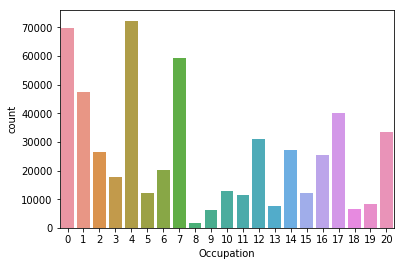

In [28]:
sns.countplot(bf_purchase_df['Occupation'])

(array([117064.,  44238.,  84485.,  79488.,   7837.,  24516.,  38907.,
         39474.,  65414.,  48645.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <a list of 10 Patch objects>)

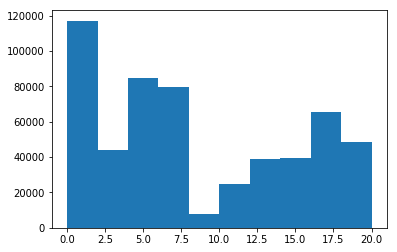

In [30]:
plt.hist(bf_purchase_df['Occupation'])

As these data are masked not sure what these Occupation means exactly but for sure 0,4 seems to be having highest purchasing records. Already in numeric form no encoding required.

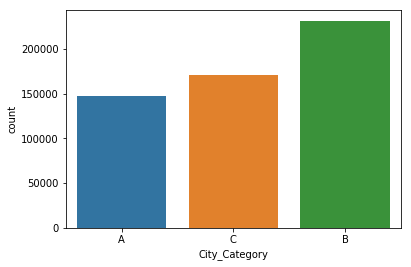

In [31]:
sns.countplot(bf_purchase_df['City_Category'])

In City_Category, we have more counts for B and this feature should be encoded.

In [32]:
encode_list.append('City_Category')

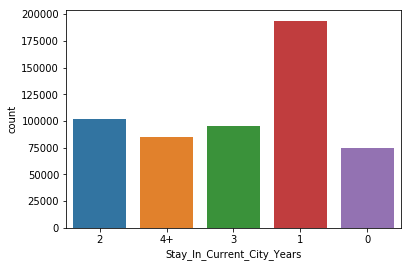

In [33]:
sns.countplot(bf_purchase_df['Stay_In_Current_City_Years'])

In Stay_In_Current_City_Years, the people who have spent almost 1 year are keen for Black Friday sale. I assume they feel more settled by now and are aware of the Black friday cheap prices.Here we just need to change 4+ to 4 only.But the we have to see its relation with Purchase data.

In [34]:
def map_stay_in_city(stay):
    if stay == '4+':
        return 4
    else:
        return int(stay)
bf_purchase_df['Stay_In_Current_City_Years']=bf_purchase_df['Stay_In_Current_City_Years'].apply(map_stay_in_city)

In [35]:
bf_purchase_df['Stay_In_Current_City_Years'].value_counts()

1    193821
2    101838
3     95285
4     84726
0     74398
Name: Stay_In_Current_City_Years, dtype: int64

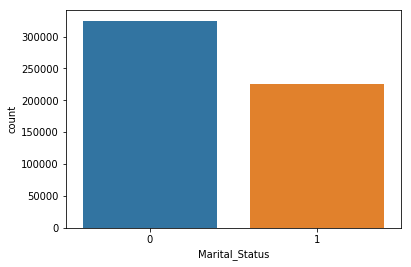

In [36]:
sns.countplot(bf_purchase_df['Marital_Status'])

Here it seems, People with Marital_Status=0 tends to go around shopping more than others. Unmarried people do more shopping.

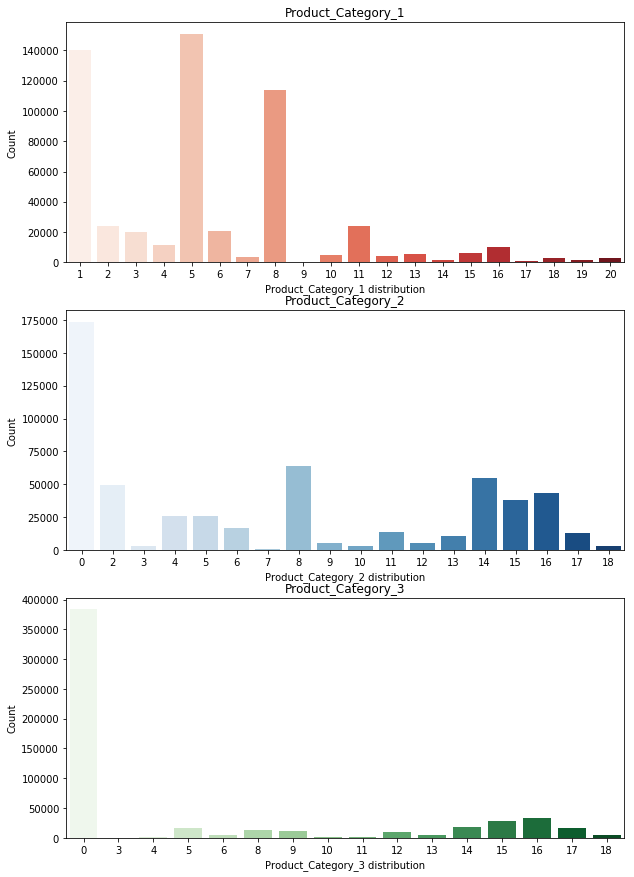

In [37]:
plt.rcParams['figure.figsize'] = (10, 15)

plt.subplot(3,1,1)
sns.countplot(bf_purchase_df['Product_Category_1'],palette='Reds')
plt.title("Product_Category_1")
plt.xlabel("Product_Category_1 distribution")
plt.ylabel("Count")

plt.subplot(3,1,2)
sns.countplot(bf_purchase_df['Product_Category_2'],palette='Blues')
plt.title("Product_Category_2")
plt.xlabel("Product_Category_2 distribution")
plt.ylabel("Count")

plt.subplot(3,1,3)
sns.countplot(bf_purchase_df['Product_Category_3'],palette='Greens')
plt.title("Product_Category_3")
plt.xlabel("Product_Category_3 distribution")
plt.ylabel("Count")

plt.show()

These are masked values but we see Product_Category_1 has highest count in 5 followed by 1.Product_Category_2 & Product_Category_3 have more missing values which we did replace by 0 hence the counts are max for 0.


Text(0.5, 1.0, 'Purchase distribution plot')

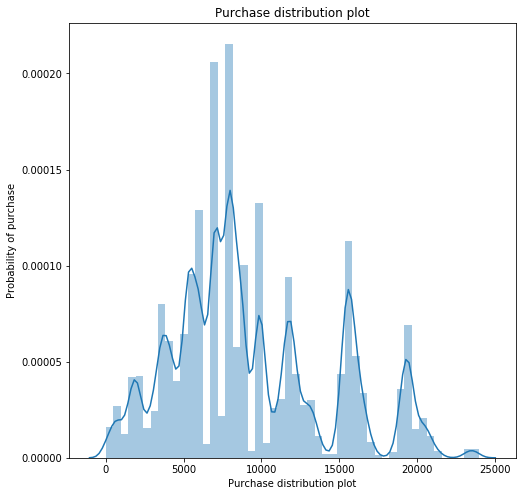

In [38]:
plt.rcParams['figure.figsize'] = (8,8)
sns.distplot(bf_purchase_df['Purchase'],kde=True)
plt.xlabel("Purchase distribution plot")
plt.ylabel("Probability of purchase")
plt.title("Purchase distribution plot")

As shown in the plot we have, Mean of Purchase : 9263.968712959126 and std is : 5023.065393820627 and this data is not in Standard Normal form.

#### Step 7: Bivariate Analysis

In this part we will analysis the relation between diff features

In [39]:
bf_purchase_df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,0,0,8370
1,F,0-17,10,A,2,0,1,6,14,15200
2,F,0-17,10,A,2,0,12,0,0,1422
3,F,0-17,10,A,2,0,12,14,0,1057
4,M,55+,16,C,4,0,8,0,0,7969


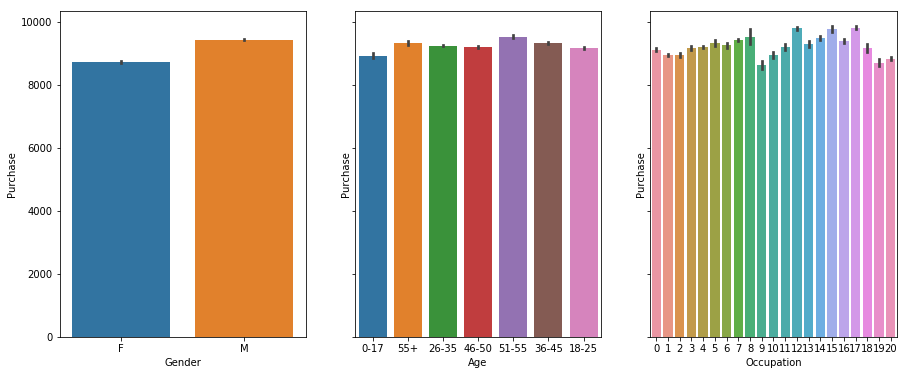

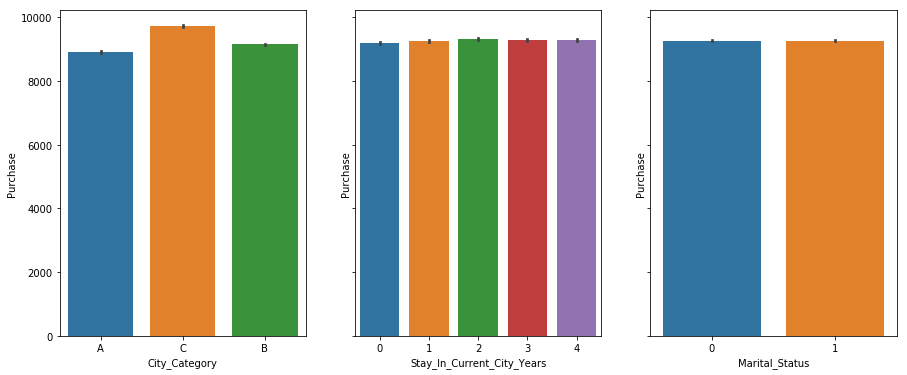

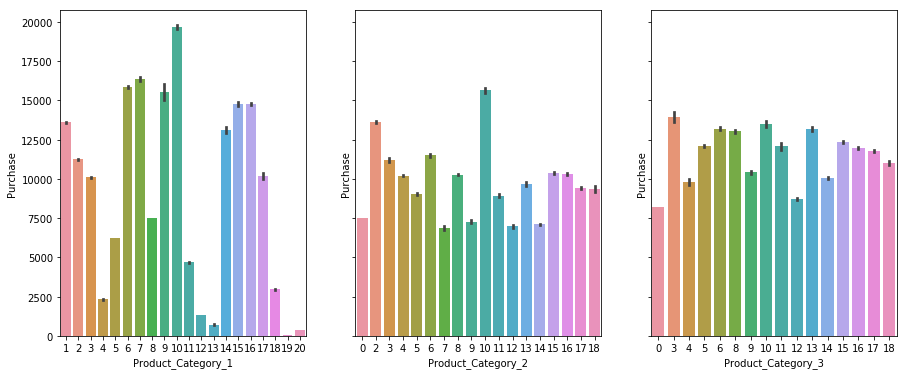

In [40]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, sharey=True,figsize=(15,6))
fig, (ax4,ax5,ax6) = plt.subplots(ncols=3, sharey=True,figsize=(15,6))
fig, (ax7,ax8,ax9) = plt.subplots(ncols=3, sharey=True,figsize=(15,6))

# Gender vs Purchase
sns.barplot(x=bf_purchase_df['Gender'],y=bf_purchase_df['Purchase'],data=bf_purchase_df[['Gender','Purchase']].groupby('Gender').mean().sort_values(by=['Purchase'],ascending=False),ax=ax1)
# Age vs Purchase
sns.barplot(x=bf_purchase_df['Age'],y=bf_purchase_df['Purchase'],data=bf_purchase_df[['Age','Purchase']].groupby('Age').mean().sort_values(by=['Purchase'],ascending=False),ax=ax2)
# Occupation vs Purchase
sns.barplot(x=bf_purchase_df['Occupation'],y=bf_purchase_df['Purchase'],data=bf_purchase_df[['Occupation','Purchase']].groupby('Occupation').mean().sort_values(by=['Purchase'],ascending=False),ax=ax3)
# City_Category vs Purchase
sns.barplot(x=bf_purchase_df['City_Category'],y=bf_purchase_df['Purchase'],data=bf_purchase_df[['City_Category','Purchase']].groupby('City_Category').mean().sort_values(by=['Purchase'],ascending=False),ax=ax4)
# Stay_In_Current_City_Years vs Purchase
sns.barplot(x=bf_purchase_df['Stay_In_Current_City_Years'],y=bf_purchase_df['Purchase'],data=bf_purchase_df[['Stay_In_Current_City_Years','Purchase']].groupby('Stay_In_Current_City_Years').mean().sort_values(by=['Purchase'],ascending=False),ax=ax5)
# Marital_Status vs Purchase
sns.barplot(x=bf_purchase_df['Marital_Status'],y=bf_purchase_df['Purchase'],data=bf_purchase_df[['Marital_Status','Purchase']].groupby('Marital_Status').mean().sort_values(by=['Purchase'],ascending=False),ax=ax6)
# Product_Category_1 vs Purchase
sns.barplot(x=bf_purchase_df['Product_Category_1'],y=bf_purchase_df['Purchase'],data=bf_purchase_df[['Product_Category_1','Purchase']].groupby('Product_Category_1').mean().sort_values(by=['Purchase'],ascending=False),ax=ax7)
# Product_Category_2 vs Purchase
sns.barplot(x=bf_purchase_df['Product_Category_2'],y=bf_purchase_df['Purchase'],data=bf_purchase_df[['Product_Category_2','Purchase']].groupby('Product_Category_2').mean().sort_values(by=['Purchase'],ascending=False),ax=ax8)
# Product_Category_3 vs Purchase
sns.barplot(x=bf_purchase_df['Product_Category_3'],y=bf_purchase_df['Purchase'],data=bf_purchase_df[['Product_Category_3','Purchase']].groupby('Product_Category_3').mean().sort_values(by=['Purchase'],ascending=False),ax=ax9)

plt.show()

1. We find the amount spent on Purchase by male is more than Female.
2. As seen in Univariate analysis, we found that the people of age 26-35 have more counts in the data but when we see the data with Purchase we find people of 51-55 are spending more than others.
3. The Occupation, category 17 has the highest purchase values. So Occupation has some relation to purchase.
4. City category C people have done more Purchase
5. The Stay_In_Current_City_Years have no such impact on Purchase, they all have equal Purchase data.
6. Unmarried tends to Purchase just a bit more than Married ones.
7. Product_Category_X columns have varying purchase amounts.So not dropping the Product_Category_2,Product_Category_3 was wise as we can see some sort of relation here.

Use the below code for diff features to see the values.

In [41]:
bf_purchase_df[['Product_Category_1','Purchase']].groupby('Product_Category_1').mean().sort_values(by=['Purchase'],ascending=False).head(1) 

,Purchase
Product_Category_1,
10,19675.571


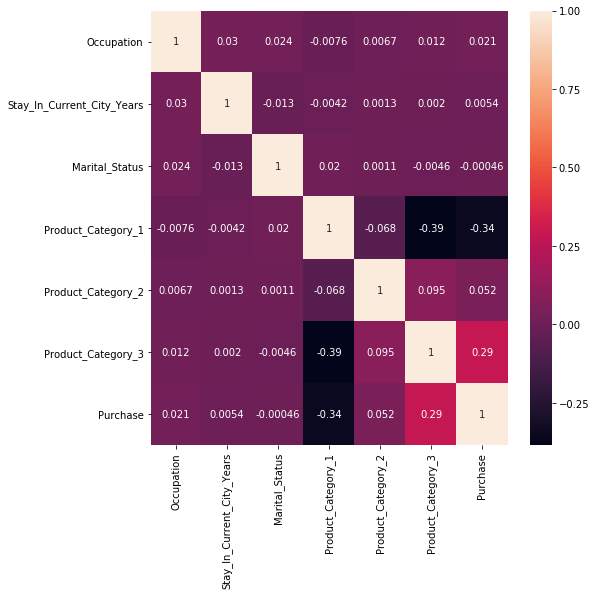

In [42]:
sns.heatmap(bf_purchase_df.corr(),annot=True)

1. Product_Category_1 has -ve correlation with Purchase, might be the product in this category are expensive.
2. Product_Category_3 has +ve correlation with Purchase, might be the product in this category are cheap.
3. Marital status still has a small -ve correlation with Purchase as we already saw that Unmarried people had more counts.

#### Step 7: Feature Encoding

In [43]:
le = LabelEncoder()
for each in encode_list:
    bf_purchase_df[each]=le.fit_transform(bf_purchase_df[each])

In [44]:
bf_purchase_df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,0,0,8370
1,0,0,10,0,2,0,1,6,14,15200
2,0,0,10,0,2,0,12,0,0,1422
3,0,0,10,0,2,0,12,14,0,1057
4,1,6,16,2,4,0,8,0,0,7969


#### Step 8: Feature Scaling

In [45]:
std_scale = StandardScaler()
#bf_purchase_df = pd.DataFrame(std_scale.fit_transform(bf_purchase_df.values), columns=bf_purchase_df.columns, index=bf_purchase_df.index)
bf_purchase_df[['Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1','Product_Category_2', 'Product_Category_3']] = std_scale.fit_transform(bf_purchase_df[['Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1','Product_Category_2', 'Product_Category_3']])

In regression we can scale the target variables but we are not doing so here as they expected error should be in true terms of Purchase. So except Target column we will scale all the values.

In [46]:
bf_purchase_df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,-1.747,-1.844,0.295,-1.372,0.110,-0.833,-0.611,-1.084,-0.615,8370
1,-1.747,-1.844,0.295,-1.372,0.110,-0.833,-1.119,-0.118,1.625,15200
2,-1.747,-1.844,0.295,-1.372,0.110,-0.833,1.676,-1.084,-0.615,1422
3,-1.747,-1.844,0.295,-1.372,0.110,-0.833,1.676,1.169,-0.615,1057
4,0.573,2.588,1.215,1.259,1.661,-0.833,0.659,-1.084,-0.615,7969


## Applying all the changes to the test data set

In [155]:
Test_bf_purchase = pd.read_csv("test.csv",header="infer",sep=",")

In [156]:
#Removed 'User_ID','Product_ID'
Test_bf_purchase.drop(columns=['User_ID','Product_ID'],axis=1,inplace=True) 

In [157]:
# Encoding the columns as per encoding list
le = LabelEncoder()
for each in encode_list:
    Test_bf_purchase[each]=le.fit_transform(Test_bf_purchase[each])

In [158]:
# Change 4+ in Stay_In_Current_City_Years to 4
Test_bf_purchase['Stay_In_Current_City_Years']=Test_bf_purchase['Stay_In_Current_City_Years'].apply(map_stay_in_city)

In [159]:
# Fill 0 for missing values in Product_Category_2 & Product_Category_3
Test_bf_purchase.fillna(value=0,inplace=True,axis=1)
convert_dict = {'Product_Category_2':int,'Product_Category_3':int}
Test_bf_purchase = Test_bf_purchase.astype(convert_dict)

In [160]:
# Scaling the data
Test_bf_purchase = pd.DataFrame(std_scale.fit_transform(Test_bf_purchase),columns=Test_bf_purchase.columns,index=Test_bf_purchase.index)

In [161]:
Test_bf_purchase.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0.574,1.112,-0.166,-0.056,0.110,1.199,-1.145,0.676,-0.616
1,0.574,-0.368,1.367,1.261,-1.443,-0.834,-0.609,-0.289,-0.616
2,-1.743,0.372,-1.087,-0.056,1.664,1.199,-0.074,1.158,-0.616
3,-1.743,0.372,-1.087,-0.056,1.664,1.199,-0.342,0.354,-0.616
4,-1.743,-0.368,-1.087,1.261,-0.666,-0.834,-0.342,-0.289,1.302


### Now the data looks all set for Spliting and Modeling

## Train Test Split of the Data

In [54]:
bf_purchase_df.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [55]:
X = bf_purchase_df[['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3']]
Y = bf_purchase_df['Purchase']

In [56]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(440054, 9) (110014, 9) (440054,) (110014,)


## Linear Regression

In [57]:
linReg = LinearRegression()
linReg.fit(X_train,Y_train)
Y_pred_linreg = linReg.predict(X_test)

In [58]:
rmse_linReg = np.sqrt(mean_squared_error(Y_test,Y_pred_linreg))
print(rmse_linReg)

4628.825978799467


In [59]:
results = {'Linear Regression': rmse_linReg} #created a dictionary to keep on adding the values for rmse on applying various models.

## Cross Validation in Linear Regression

In [60]:
cv_score = cross_val_score(linReg,X,Y,scoring='neg_mean_squared_error')
rmse_cv_linReg = np.sqrt(np.mean(cv_score*(-1)))
print(rmse_cv_linReg)

4628.431110898982


In [61]:
results['Cross Validation Linear Regression']=rmse_cv_linReg

## Applying Lasso and LassoCV

In [62]:
lasso_cv = LassoCV(alphas=[0.001,0.01,0.1,1,10,100])
lasso_cv.fit(X,Y)
lasso_cv.alpha_

0.001

In [63]:
lasso_cv = LassoCV(alphas=[0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009])
lasso_cv.fit(X,Y)
lasso_cv.alpha_

0.001

In [64]:
lasso_cv = LassoCV(alphas=[0.0010,0.0011,0.0012,0.0013,0.0014,0.0015])
lasso_cv.fit(X,Y)
lasso_cv.alpha_

0.001

On deep down analysis we still find alpha=0.001 is the optimum value.Hence apply the alpha value for Lasso with Cross validation.

In [65]:
lasso = Lasso(alpha=0.001)
lasso_score = cross_val_score(lasso,X,Y,scoring='neg_mean_squared_error')
lasso_rmse = np.sqrt(np.mean(lasso_score*(-1)))
print(lasso_rmse)
results['Lasso CV']=lasso_rmse

4628.431118978777


In [66]:
lasso.fit(X,Y)
lasso.coef_ # None of the coef are 0 implies minimization of error is not achieved here.

array([  205.14027861,   143.90284899,    37.38595177,   240.8207368 ,
          11.02902693,   -23.83481463, -1370.10976414,    77.95601709,
         898.05139545])

In [67]:
X.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

## Applying Ridge and RidgeCV

In [68]:
ridge_cv = RidgeCV(alphas=[0.001,0.01,0.1,1,10,100])
ridge_cv.fit(X,Y)
ridge_cv.alpha_

100.0

In [69]:
ridge_cv = RidgeCV(alphas=[90,95,100,110,115,120])
ridge_cv.fit(X,Y)
ridge_cv.alpha_

110

In [70]:
ridge_cv = RidgeCV(alphas=[110,110.5,111,111.5,112,113,114,115,120])
ridge_cv.fit(X,Y)
ridge_cv.alpha_

110.5

So the optimum value for alpha=110.5 as we find in case of RidgeCV, applying this to Ridge and Cross Validation

In [71]:
ridge = Ridge(alpha=110.5)
ridge_score = cross_val_score(ridge,X,Y,scoring='neg_mean_squared_error')
ridge_rmse = np.sqrt(np.mean(ridge_score*(-1)))
print(ridge_rmse)
results['Ridge']=ridge_rmse

4628.432539851759


### Applying Recursive Feature Elimination to find the top 6 features and applying Linear Regression

In [72]:
from sklearn.feature_selection import RFE
rfe = RFE(linReg, n_features_to_select=6)
rfe = rfe.fit(X,Y)
rfe.support_

array([ True,  True, False,  True, False, False,  True,  True,  True])

In [73]:
bf_purchase_df.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [74]:
X_1 = bf_purchase_df[['Gender', 'Age','City_Category','Product_Category_1','Product_Category_2', 'Product_Category_3']]
Y_1 = bf_purchase_df['Purchase']
X1_train,X1_test,Y1_train,Y1_test = train_test_split(X_1,Y_1,test_size=0.2,random_state=0)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(440054, 9) (110014, 9) (440054,) (110014,)


In [75]:
linReg = LinearRegression()
linReg.fit(X1_train,Y1_train)
Y1_pred_linreg = linReg.predict(X1_test)

In [76]:
rmse_linReg1 = np.sqrt(mean_squared_error(Y1_test,Y1_pred_linreg))
print(rmse_linReg1)

4628.903939576985


### The rmse value has rather increased a bit on using the top 6 features only. Also Lasso didnt make any coef to 0 so we definitely need all the features in our analysis.

## KNearestNeighbours Regression

In [77]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train,Y_train)
y_pred_knn = knn.predict(X_test)
rmse_knn = np.sqrt(mean_squared_error(Y_test,y_pred_knn))
print(rmse_knn)

3528.080099287149


Now KNN has shown some decrease in the rmse_error , lets try for different values of K here to see what value for K gives lesser rmse_error

In [78]:
# k_list = [3,5,8,10,12,15]
# for k in k_list:
#     knn = KNeighborsRegressor(n_neighbors=k)
#     knn.fit(X_train,Y_train)
#     y_pred_knn = knn.predict(X_test)
#     rmse_knn = np.sqrt(mean_squared_error(Y_test,y_pred_knn))
#     print(k)
#     print(rmse_knn)


3 => 3599.969119175768

5 => 3528.080099287149

8 => 3548.1516539859294

10 => 3570.808206305202

12 => 3594.4492322668307

15 =>3628.1275336076883

With different value for K in [3,5,8,10,12,15], we got various values of rmse and the lowest was with K=5, rmse=3528.080099287149

In [79]:
results["KNN @ k=5"]=rmse_knn

### DecisionTree Regressor

In [80]:
dtree_reg = DecisionTreeRegressor()
dtree_reg.fit(X_train,Y_train)
Y_pred_dtree = dtree_reg.predict(X_test)
rmse_dtree = np.sqrt(mean_squared_error(Y_test,Y_pred_dtree))
print(rmse_dtree)

3315.0549687973034


In [81]:
results['DecisionTreeRegressor'] = rmse_dtree

## Random Forest

In [82]:
rf_reg=RandomForestRegressor()
rf_reg.fit(X_train,Y_train)
Y_pred_rf = rf_reg.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(Y_test,Y_pred_rf))
print(rmse_rf)

3086.5289952911903


In [83]:
results['RandomForestRegressor'] = rmse_rf

## Elastic Net

In [84]:
enet = ElasticNet()
enet.fit(X_train,Y_train)
Y_pred_enet = enet.predict(X_test)
rmse_enet = np.sqrt(mean_squared_error(Y_test,Y_pred_rf))
print(rmse_enet)

3086.5289952911903


In [85]:
results['ElasticNet'] = rmse_enet

## Gradient Boosting

In [86]:
# kfold = KFold(n_splits=10,random_state=0)
# num_trees = [10,50,100,150,200,250,280,300,320,350]
# for tree in num_trees:
#     gbm_reg = GradientBoostingRegressor(n_estimators=tree)
#     rmse_gbm = np.sqrt(np.mean(cross_val_score(gbm_reg,X,Y,cv=kfold,scoring="neg_mean_squared_error")*(-1)))
#     print("For trees "+str(tree)+" the rmse is "+str(rmse_gbm))

> - For trees 10 the rmse is 3830.978500784098
> - For trees 50 the rmse is 3047.7874973281823
> - For trees 100 the rmse is 2992.904349349215
> - For trees 150 the rmse is 2974.8543986528234
> - For trees 200 the rmse is 2965.264006178656
> - For trees 250 the rmse is 2957.3631018282176
> - For trees 280 the rmse is 2953.5320749737725
> - For trees 300 the rmse is 2951.441951095335
> - For trees 320 the rmse is 2949.569092901719
> - For trees 350 the rmse is 2947.355237588074
> - For trees 380 the rmse is 2945.3391364284134
> - For trees 400 the rmse is 2944.0982086254216
> - For trees 420 the rmse is 2943.0290451755877
> - For trees 450 the rmse is 2941.581659600521

In [109]:
kfold = KFold(n_splits=10,random_state=0)
num_trees = [450]
for tree in num_trees:
    gbm_reg = GradientBoostingRegressor(n_estimators=tree)
    rmse_gbm = np.sqrt(np.mean(cross_val_score(gbm_reg,X,Y,cv=kfold,scoring="neg_mean_squared_error")*(-1)))
    print("For trees "+str(tree)+" the rmse is "+str(rmse_gbm))

For trees 380 the rmse is 2945.3391364284134
For trees 400 the rmse is 2944.0982086254216
For trees 420 the rmse is 2943.0290451755877
For trees 450 the rmse is 2941.581659600521


In [113]:
results['GradientBoostingRegressor,k=450'] = 2941.581659600521

## AdaBoost Regressor

In [89]:
# kfold = KFold(n_splits=10,random_state=0)
# num_trees = [280,300,320,350,380]
# for tree in num_trees:
#     adb_reg = AdaBoostRegressor(n_estimators=tree)
#     rmse_adb = np.sqrt(np.mean(cross_val_score(adb_reg,X,Y,cv=kfold,scoring="neg_mean_squared_error")*(-1)))
#     print("For trees "+str(tree)+" the rmse is "+str(rmse_adb))

> - For trees 280 the rmse is 3830.167360240315
> - For trees 300 the rmse is 3861.5883145062335
> - For trees 320 the rmse is 3851.7792834867732
> - For trees 350 the rmse is 3872.237863958348
> - For trees 380 the rmse is 3883.50091810719

In [90]:
kfold = KFold(n_splits=10,random_state=0)
num_trees = [280]
for tree in num_trees:
    adb_reg = AdaBoostRegressor(n_estimators=tree)
    rmse_adb = np.sqrt(np.mean(cross_val_score(adb_reg,X,Y,cv=kfold,scoring="neg_mean_squared_error")*(-1)))
    print("For trees "+str(tree)+" the rmse is "+str(rmse_adb))

For trees 280 the rmse is 3846.041443639008


In [114]:
results['AdaBoostRegressor,k=280'] = 3830.167360240315

## XGBoost

In [92]:
#!pip install xgboost

In [93]:
# kfold = KFold(n_splits=10,random_state=0)
# num_trees = [200,280,300,320,350,380]
# for tree in num_trees:
#     xgb_reg = XGBRegressor(n_estimators=tree)
#     rmse_xgb = np.sqrt(np.mean(cross_val_score(xgb_reg,X,Y,cv=kfold,scoring="neg_mean_squared_error")*(-1)))
#     print("For trees "+str(tree)+" the rmse is "+str(rmse_xgb))

## SVR

In [94]:
# svr = SVR(kernel = 'rbf')
# svr.fit(X_train,Y_train)
# y_pred_svr = svr.predict(X_test)
# rmse_svr = np.sqrt(mean_squared_error(Y_test,y_pred_svr))
# print(rmse_svr)

In [95]:
#results['SVR'] = rmse_svr

In [117]:
results

{'Linear Regression': 4628.825978799467,
 'Cross Validation Linear Regression': 4628.431110898982,
 'Lasso CV': 4628.431118978777,
 'Ridge': 4628.432539851759,
 'KNN @ k=5': 3528.080099287149,
 'DecisionTreeRegressor': 3315.0549687973034,
 'RandomForestRegressor': 3086.5289952911903,
 'ElasticNet': 3086.5289952911903,
 'GradientBoostingRegressor,k=320': 2949.569092901719,
 'AdaBoostRegressor,k=280': 3830.167360240315,
 'GradientBoostingRegressor,k=450': 2941.581659600521}

In [118]:
result = pd.DataFrame()
algo=[]
rmse=[]
for k,v in results.items():
    algo.append(k)
    rmse.append(v)
result['Algo'] = algo
result['rmse'] = rmse

In [119]:
result

,Algo,rmse
0,Linear Regression,4628.826
1,Cross Validation Linear Regression,4628.431
2,Lasso CV,4628.431
3,Ridge,4628.433
4,KNN @ k=5,3528.080
5,DecisionTreeRegressor,3315.055
6,RandomForestRegressor,3086.529
7,ElasticNet,3086.529
8,"GradientBoostingRegressor,k=320",2949.569
9,"AdaBoostRegressor,k=280",3830.167


In [125]:
result.sort_values(by='rmse')

,Algo,rmse
10,"GradientBoostingRegressor,k=450",2941.582
8,"GradientBoostingRegressor,k=320",2949.569
6,RandomForestRegressor,3086.529
7,ElasticNet,3086.529
5,DecisionTreeRegressor,3315.055
4,KNN @ k=5,3528.080
9,"AdaBoostRegressor,k=280",3830.167
1,Cross Validation Linear Regression,4628.431
2,Lasso CV,4628.431
3,Ridge,4628.433


We find the lowest RMSE error with GradientBoostingRegressor with k=450 and rmse error = 2941.582

### Now applying the GradientBoostingRegressor with k=450 on out Test Data

In [162]:
gbm_reg = GradientBoostingRegressor(n_estimators=450)
gbm_reg.fit(X,Y)
Test_purchase_pred = gbm_reg.predict(Test_bf_purchase)

In [128]:
len(Test_purchase_pred)

233599

In [140]:
Test_bf_df = pd.read_csv("test.csv",header="infer",sep=",")
Test_bf_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [151]:
result_out = Test_bf_df[['User_ID','Product_ID']]
result_out['Purchase'] = Test_purchase_pred
result_out = result_out[['Purchase','User_ID','Product_ID']]

In [153]:
result_out.head()

,Purchase,User_ID,Product_ID
0,13187.944,1000004,P00128942
1,10274.780,1000009,P00113442
2,6062.523,1000010,P00288442
3,2629.479,1000010,P00145342
4,2501.923,1000011,P00053842


In [152]:
result_out.to_csv('out.csv',sep=",",header=True,index=False)